In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss


In [2]:
covertype_path = '/media/ronit/04101CEC101CE708/UCSD Spring 2017/CSE 291/Homework2/covtype.data'

names = [
    'Elevation',
    'Aspect',
    'Slope',
    'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology',
    'Horizontal_Distance_To_Roadways',
    'Hillshade_9am',
    'Hillshade_Noon',
    'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points',
]

Wilderness_Area = []
for i in range(4):
    Wilderness_Area.append('Wilderness_Area_{}'.format(i+1))

Soil_Type = []
for i in range(40):
    Soil_Type.append('Soil_Type_{}'.format(i+1))

names.extend(Wilderness_Area + Soil_Type + ['Cover_Type'])
covertype_df = pd.read_csv(covertype_path, names=names)

In [3]:
covertype_df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [4]:
rows=range(0,581012,10)
covertype_df= covertype_df.ix[rows]
covertype_df.shape

(58102, 55)

In [19]:
from scipy import linalg
a=[[1,2,3],[4,5,6],[7,8,9]]
a=np.matrix(a)
b=[[1],[1],[1]]
c=linalg.sqrtm(a)
(a.T).dot(b)

matrix([[12],
        [15],
        [18]])

In [5]:
X = covertype_df.drop('Cover_Type',axis=1)
y = covertype_df['Cover_Type']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25, random_state=42)

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss
from sklearn.utils import resample
from collections import defaultdict
import matplotlib.pyplot as plt
from scipy import stats

In [8]:
X={}
y={}
data_index={}
for i in [50,75,100]:
    data_index[i]=np.random.random_integers(0,len(X_train)-1, size=int((i/100)*len(X_train)))
    X[i]=X_train[data_index[i],:]
    y[i]=y_train[data_index[i]]
    

/home/ronit/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 43575 + 1) instead


In [9]:
X[100][:].shape

(43576, 54)

In [29]:
from sklearn.neighbors import KNeighborsClassifier
sco_final_20={}
for i in [50,75,100]:
    sco=defaultdict(list)
    for k in range(1,21):
        neigh = KNeighborsClassifier(n_neighbors=k)
        for n_folds in [2,5]:
            cv = KFold(n_splits=n_folds)
            sc = cross_val_score(neigh,X[i],y[i],cv=cv)
            sco[k].append(sc.mean())
        print('k=  ',k,'  i=  ',i)    
    sco_final_20[i]=sco

k=   1   i=   50
k=   2   i=   50
k=   3   i=   50
k=   4   i=   50
k=   5   i=   50
k=   6   i=   50
k=   7   i=   50
k=   8   i=   50
k=   9   i=   50
k=   10   i=   50
k=   11   i=   50
k=   12   i=   50
k=   13   i=   50
k=   14   i=   50
k=   15   i=   50
k=   16   i=   50
k=   17   i=   50
k=   18   i=   50
k=   19   i=   50
k=   20   i=   50
k=   1   i=   75
k=   2   i=   75
k=   3   i=   75
k=   4   i=   75
k=   5   i=   75
k=   6   i=   75
k=   7   i=   75
k=   8   i=   75
k=   9   i=   75
k=   10   i=   75
k=   11   i=   75
k=   12   i=   75
k=   13   i=   75
k=   14   i=   75
k=   15   i=   75
k=   16   i=   75
k=   17   i=   75
k=   18   i=   75
k=   19   i=   75
k=   20   i=   75
k=   1   i=   100
k=   2   i=   100
k=   3   i=   100
k=   4   i=   100
k=   5   i=   100
k=   6   i=   100
k=   7   i=   100
k=   8   i=   100
k=   9   i=   100
k=   10   i=   100
k=   11   i=   100
k=   12   i=   100
k=   13   i=   100
k=   14   i=   100
k=   15   i=   100
k=   16   i=   100
k= 

In [10]:
k_val=[]
for i in range(1,21):
    k_val.append(i)
for i in range(5,11):
    k_val.append(i*5)
k_val    

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 25,
 30,
 35,
 40,
 45,
 50]

In [15]:
from sklearn.neighbors import KNeighborsClassifier
sco_final_loo={}
for i in [50,75,100]:
    sco=defaultdict(list)
    for k in k_val:
        neigh = KNeighborsClassifier(n_neighbors=k)
        neigh.fit(X[i],y[i])
        sc=one_out(neigh,X[i],y[i],k)
        sco[k].append(sc)
        print('k=  ',k,'  i=  ',i)    
    sco_final_loo[i]=sco

k=   1   i=   50
k=   2   i=   50
k=   3   i=   50
k=   4   i=   50
k=   5   i=   50
k=   6   i=   50
k=   7   i=   50
k=   8   i=   50
k=   9   i=   50
k=   10   i=   50
k=   11   i=   50
k=   12   i=   50
k=   13   i=   50
k=   14   i=   50
k=   15   i=   50
k=   16   i=   50
k=   17   i=   50
k=   18   i=   50
k=   19   i=   50
k=   20   i=   50
k=   25   i=   50
k=   30   i=   50
k=   35   i=   50
k=   40   i=   50
k=   45   i=   50
k=   50   i=   50
k=   55   i=   50
k=   60   i=   50
k=   65   i=   50
k=   70   i=   50
k=   75   i=   50
k=   80   i=   50
k=   85   i=   50
k=   90   i=   50
k=   95   i=   50
k=   100   i=   50
k=   1   i=   75
k=   2   i=   75
k=   3   i=   75
k=   4   i=   75
k=   5   i=   75
k=   6   i=   75
k=   7   i=   75
k=   8   i=   75
k=   9   i=   75
k=   10   i=   75
k=   11   i=   75
k=   12   i=   75
k=   13   i=   75
k=   14   i=   75
k=   15   i=   75
k=   16   i=   75
k=   17   i=   75
k=   18   i=   75
k=   19   i=   75
k=   20   i=   75
k=   25  

In [34]:
def one_out(neigh,X,y,k):
    right=0
    for i in range(len(y)):
        te = np.array(X[i]).reshape((1, -1))
        dist,ind=neigh.kneighbors(te,n_neighbors=k+2, return_distance=True)
        ind=ind[0]
        dist=dist[0]
        sort_dist_index=np.argsort(dist)
        ind_sort=[ind[j] for j in sort_dist_index]
        ind_sort=[ind_sort[g] for g in range(1,k+1)]
        a,b=stats.mode(y[ind_sort])
        if(a==y[i]):
            right=right+1
    return (right/len(y))

In [11]:
with open('/home/ronit/scores_eulidean_cover.txt','r') as inf:
    sco_final = eval(inf.read())

In [12]:
with open('/home/ronit/scores_eulidean_cover_20.txt','r') as inf:
    sco_final_20 = eval(inf.read())

In [16]:
with open('/home/ronit/scores_eulidean_cover_loo.txt','r') as inf:
    sco_final_loo = eval(inf.read())

In [17]:
final_score_2_fold={}
final_score_5_fold={}


for i in [50,75,100]:
    sco_2=[]
    sco_5=[]
    
    for k in k_val:
        
        if(k>20):
            sco_2.append(sco_final[i][k][0])
            sco_5.append(sco_final[i][k][1])
            
        else:
            
            sco_2.append(sco_final_20[i][k][0])
            sco_5.append(sco_final_20[i][k][1])
     
    
    final_score_2_fold[i]=sco_2     
    final_score_5_fold[i]=sco_5

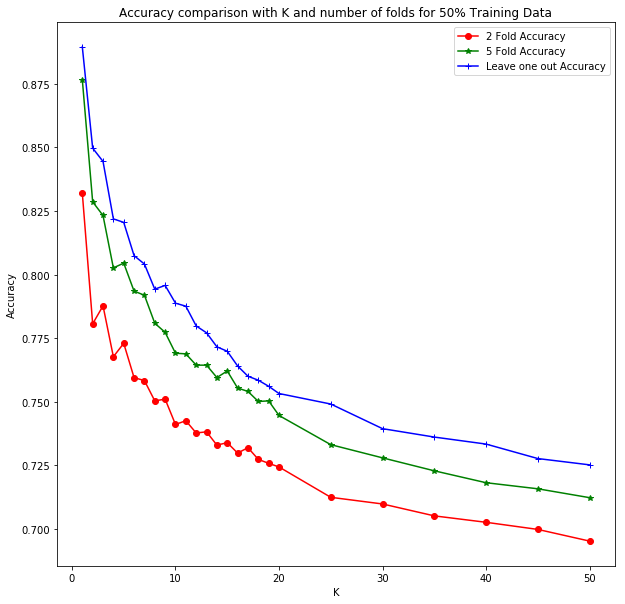

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo[50][i] for i in k_val]

plt.plot(k_val,final_score_2_fold[50],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(k_val,final_score_5_fold[50],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(k_val,sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 50% Training Data')
plt.legend()

plt.show()

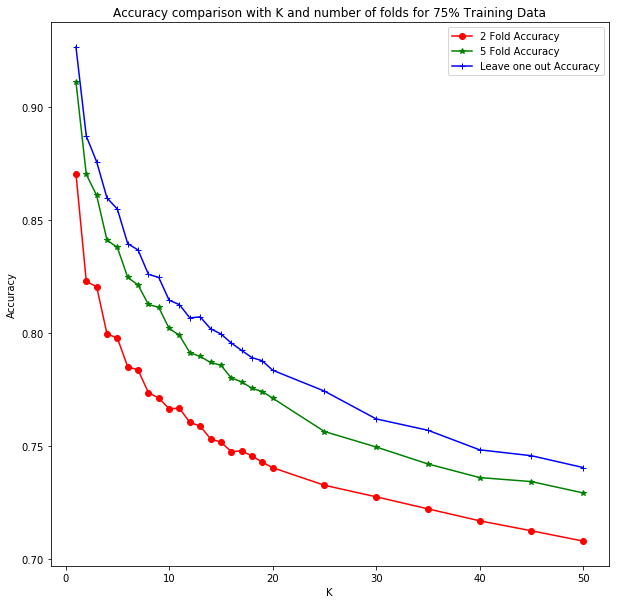

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo[75][i] for i in k_val]

plt.plot(k_val,final_score_2_fold[75],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(k_val,final_score_5_fold[75],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(k_val,sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 75% Training Data')
plt.legend()

plt.show()

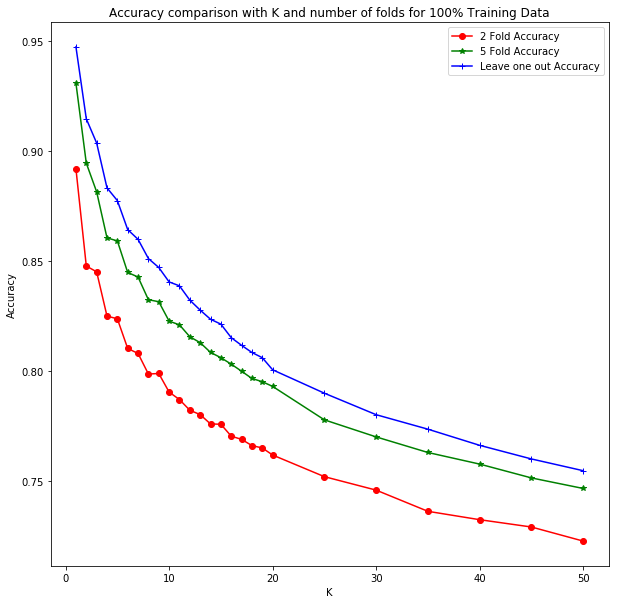

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo[100][i] for i in k_val]

plt.plot(k_val,final_score_2_fold[100],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(k_val,final_score_5_fold[100],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(k_val,sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 100% Training Data')
plt.legend()

plt.show()

In [21]:
from sklearn.neighbors import KNeighborsClassifier
score_test={}
for K in range(1,11):
    
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(X[100],y[100])
    score_test[K]=neigh.score(X_test,y_test) 

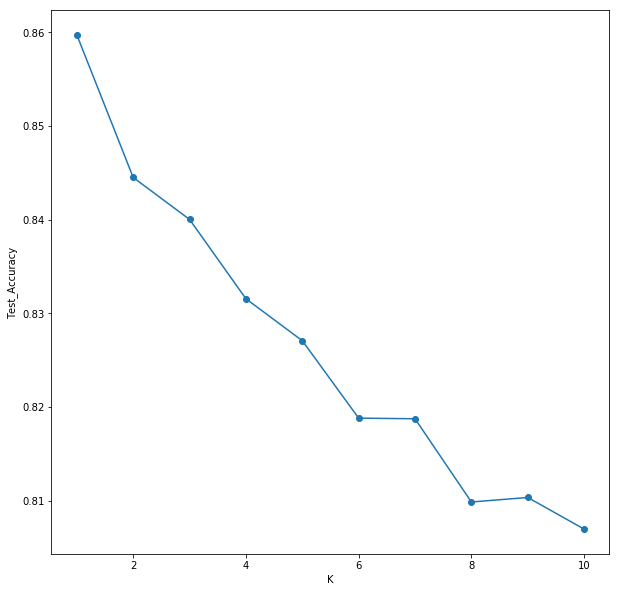

In [22]:
plt.figure(figsize=(10,10))
sco=[score_test[i] for i in range(1,11)]
plt.plot(range(1,11),sco,marker='o')
plt.xlabel('K')
plt.ylabel('Test_Accuracy')
plt.show()

In [23]:
score_test

{1: 0.8596998485474322,
 2: 0.84448574969021062,
 3: 0.8400110147322043,
 4: 0.83154343935013075,
 5: 0.82706870439212443,
 6: 0.81880765523888199,
 7: 0.81873881316260499,
 8: 0.80985818532286935,
 9: 0.81034007985680845,
 10: 0.80696681811923443}

In [24]:
sco_final_20[100][1]

[0.8920506700936295, 0.9309941319068973]

In [25]:
sco_final_loo[100][1]

[0.9474940334128878]

In [26]:
X={}
y={}
data_index={}
for i in [50,75,100]:
    data_index[i]=np.random.random_integers(0,len(X_train)-1, size=int((i/400)*len(X_train)))
    X[i]=X_train[data_index[i],:]
    y[i]=y_train[data_index[i]]

/home/ronit/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:5: DeprecationWarning: This function is deprecated. Please call randint(0, 43575 + 1) instead


In [16]:
%store sco_final_loo

Stored 'sco_final_loo' (dict)


In [17]:
%store sco_final_loo >scores_eulidean_cover_loo.txt 

Writing 'sco_final_loo' (dict) to file 'scores_eulidean_cover_loo.txt'.


In [17]:
%store sco_final

Stored 'sco_final' (dict)


In [18]:
%store sco_final >scores_eulidean_cover.txt 

Writing 'sco_final' (dict) to file 'scores_eulidean_cover.txt'.


In [8]:
covariance=np.cov((X_train).T)

In [9]:
inv=np.linalg.pinv(covariance)

In [32]:
from sklearn.neighbors import DistanceMetric
sco_final_mah={}
for i in [50,75,100]:
    sco=defaultdict(list)
    for k in range(1,11):
        neigh = KNeighborsClassifier(algorithm ='ball_tree',n_neighbors=k,metric='mahalanobis',metric_params={"VI":inv})
        for n_folds in [2,5]:
            cv = KFold(n_splits=n_folds)
            sc = cross_val_score(neigh,X[i],y[i],cv=cv)
            sco[k*5].append(sc.mean())
        print('k=  ',k,'  i=  ',i)    
    sco_final_mah[i]=sco

k=   1   i=   50
k=   2   i=   50
k=   3   i=   50
k=   4   i=   50
k=   5   i=   50
k=   6   i=   50
k=   7   i=   50
k=   8   i=   50
k=   9   i=   50
k=   10   i=   50
k=   1   i=   75
k=   2   i=   75
k=   3   i=   75
k=   4   i=   75
k=   5   i=   75
k=   6   i=   75
k=   7   i=   75
k=   8   i=   75
k=   9   i=   75
k=   10   i=   75
k=   1   i=   100
k=   2   i=   100
k=   3   i=   100
k=   4   i=   100
k=   5   i=   100
k=   6   i=   100
k=   7   i=   100
k=   8   i=   100
k=   9   i=   100
k=   10   i=   100


In [33]:
%store sco_final_mah >scores_eulidean_cover_mah.txt 

Writing 'sco_final_mah' (dict) to file 'scores_eulidean_cover_mah.txt'.


In [38]:
sco_final_loo_mah={}
for i in [50,75,100]:
    sco=defaultdict(list)
    for k in range(1,11):
        neigh = KNeighborsClassifier(algorithm ='ball_tree',n_neighbors=k,metric='mahalanobis',metric_params={"VI":inv})
        neigh.fit(X[i],y[i])
        sc=one_out(neigh,X[i],y[i],k)
        sco[k].append(sc)
        print('k=  ',k,'  i=  ',i)    
    sco_final_loo_mah[i]=sco

k=   1   i=   50
k=   2   i=   50
k=   3   i=   50
k=   4   i=   50
k=   5   i=   50
k=   6   i=   50
k=   7   i=   50
k=   8   i=   50
k=   9   i=   50
k=   10   i=   50
k=   1   i=   75
k=   2   i=   75
k=   3   i=   75
k=   4   i=   75
k=   5   i=   75
k=   6   i=   75
k=   7   i=   75
k=   8   i=   75
k=   9   i=   75
k=   10   i=   75
k=   1   i=   100
k=   2   i=   100
k=   3   i=   100
k=   4   i=   100
k=   5   i=   100
k=   6   i=   100
k=   7   i=   100
k=   8   i=   100
k=   9   i=   100
k=   10   i=   100


In [40]:
%store sco_final_loo_mah >scores_eulidean_cover_mah_loo.txt 

Writing 'sco_final_loo_mah' (dict) to file 'scores_eulidean_cover_mah_loo.txt'.


In [ ]:
with open('/home/ronit/scores_eulidean_cover_mah.txt','r') as inf:
    sco_final_mah = eval(inf.read())

In [ ]:
with open('/home/ronit/scores_eulidean_cover_mah_loo.txt','r') as inf:
    sco_final_loo_mah = eval(inf.read())

In [42]:
final_score_2_fold={}
final_score_5_fold={}


for i in [50,75,100]:
    sco_2=[]
    sco_5=[]
    
    for k in range(1,11):
        
        sco_2.append(sco_final_mah[i][k*5][0])
        sco_5.append(sco_final_mah[i][k*5][1])
            

    
    final_score_2_fold[i]=sco_2     
    final_score_5_fold[i]=sco_5

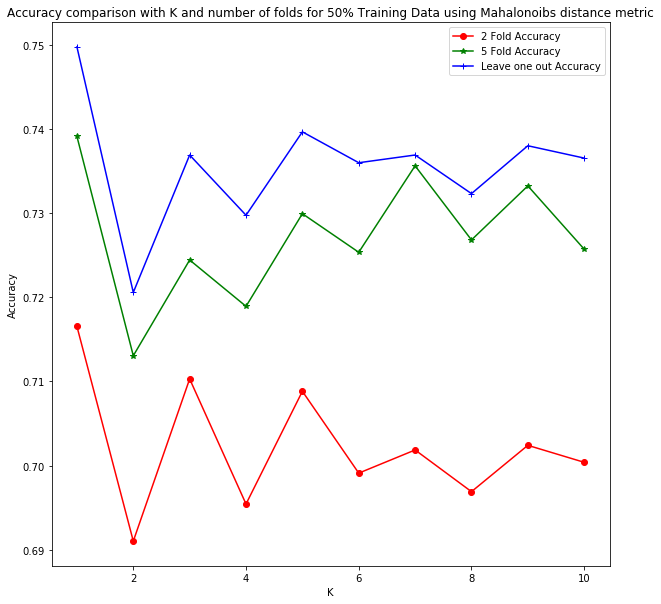

In [45]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo_mah[50][i] for i in range(1,11)]

plt.plot(range(1,11),final_score_2_fold[50],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(range(1,11),final_score_5_fold[50],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(range(1,11),sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 50% Training Data using Mahalonoibs distance metric')
plt.legend()

plt.show()

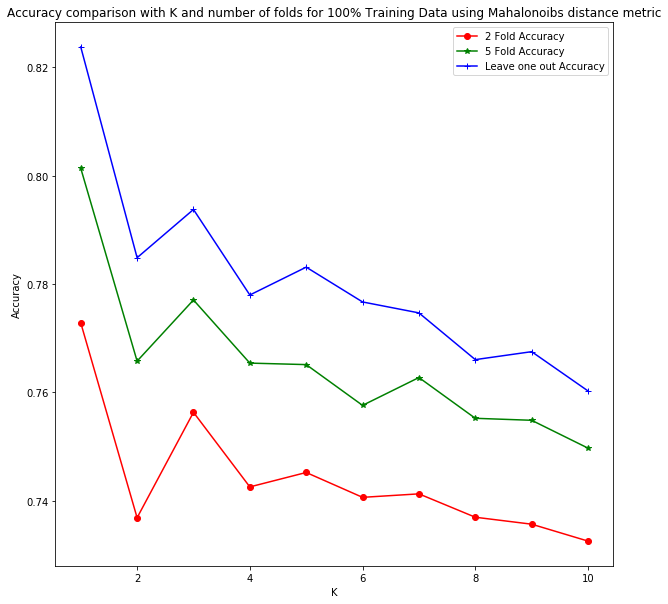

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo_mah[100][i] for i in range(1,11)]

plt.plot(range(1,11),final_score_2_fold[100],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(range(1,11),final_score_5_fold[100],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(range(1,11),sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 100% Training Data using Mahalonoibs distance metric')
plt.legend()

plt.show()

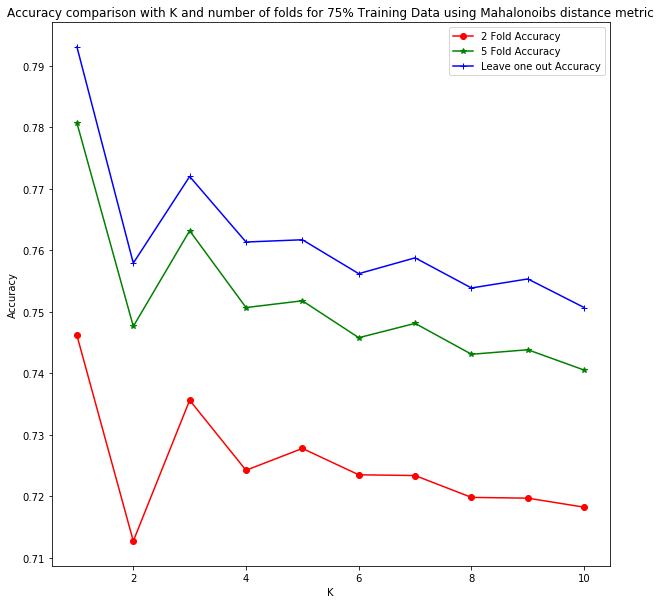

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sco_loo=[sco_final_loo_mah[75][i] for i in range(1,11)]

plt.plot(range(1,11),final_score_2_fold[75],marker='o',color='r',label='2 Fold Accuracy')
plt.plot(range(1,11),final_score_5_fold[75],marker='*',color='g',label='5 Fold Accuracy')
plt.plot(range(1,11),sco_loo,marker='+',color='b',label='Leave one out Accuracy')



plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('Accuracy comparison with K and number of folds for 75% Training Data using Mahalonoibs distance metric')
plt.legend()

plt.show()

In [50]:
sco_final_mah[100][1*5]

[0.77281072149807239, 0.80135861514725892]

In [51]:
sco_final_loo_mah[100][1]

[0.8237561960712318]

In [52]:
from sklearn.neighbors import KNeighborsClassifier
score_test={}
for K in range(1,11):
    
    neigh = KNeighborsClassifier(algorithm ='ball_tree',n_neighbors=K,metric='mahalanobis',metric_params={"VI":inv})
    neigh.fit(X[100],y[100])
    score_test[K]=neigh.score(X_test,y_test) 

In [53]:
score_test

{1: 0.77784661985405479,
 2: 0.75251273578411126,
 3: 0.76690072972600853,
 4: 0.75671210243700948,
 5: 0.7602230483271375,
 6: 0.75753820735233379,
 7: 0.7604984166322456,
 8: 0.7596034696406444,
 9: 0.75788241773371889,
 10: 0.75450915599614488}

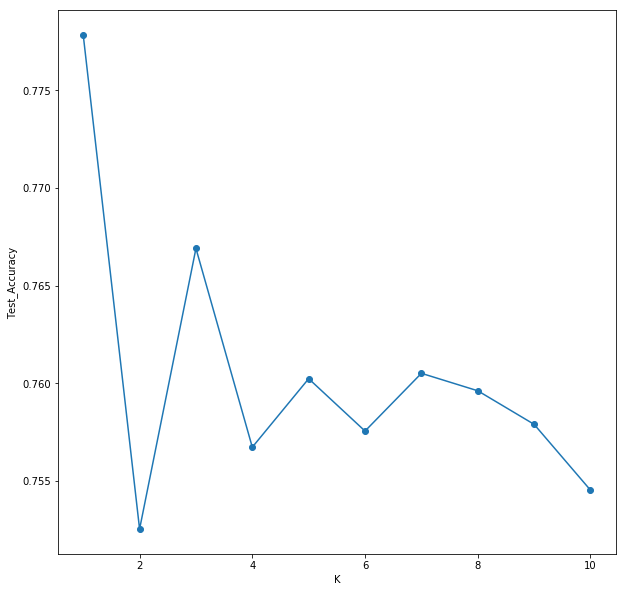

In [54]:
plt.figure(figsize=(10,10))
sco=[score_test[i] for i in range(1,11)]
plt.plot(range(1,11),sco,marker='o')
plt.xlabel('K')
plt.ylabel('Test_Accuracy')
plt.show()

In [55]:
from sklearn.neighbors import KNeighborsClassifier
score_test={}
for K in range(1,2):
    
    neigh = KNeighborsClassifier(n_neighbors=K)
    neigh.fit(X[100],y[100])
    score_test[K]=neigh.score(X_test,y_test) 

In [56]:
score_test[1]

0.77722704116756158

In [10]:
from sklearn.neighbors import KNeighborsClassifier
score_test={}
for K in range(1,2):
    
    neigh = KNeighborsClassifier(algorithm ='ball_tree',n_neighbors=K,metric='mahalanobis',metric_params={"VI":inv})
    neigh.fit(X_train,y_train)
    score_test[K]=neigh.score(X_test,y_test) 

In [11]:
score_test[1]

0.85171416769929786